In [36]:
import pandas as pd
import numpy as np
import requests
import matplotlib
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
!pip install folium
import folium

In [37]:
# get information about neighborhoods in toronto from wikipedia and save it in a variable
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
tor_neigh = requests.get(url).content
df_tor_neigh = pd.read_html(tor_neigh, header=0)[0]
df_tor_neigh.head(10)

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


In [38]:
# remove "Not assigned" values and cleaning the data
df_tor = df_tor_neigh[df_tor_neigh.Borough != 'Not assigned']

# drop duplicates values from the data frame
df_tor = df_tor.drop_duplicates()

# rename the columns into PostalCode & Neighborhood
df_tor.rename(columns = {"Postal Code":"PostalCode", "Neighbourhood":"Neighborhood"} , inplace = True)
df_tor.reset_index(inplace=True, drop=True) # rest the index
df_tor

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [39]:
# read the csv file that has the geographical coordinates of each postal code
df_geo = pd.read_csv("https://cocl.us/Geospatial_data")
df_geo.head(10)

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [40]:
# make a new data the merge the two data frames with replacing the postal code column
df_geo1 = df_tor.join(df_geo.set_index("Postal Code"), on="PostalCode")
df_geo1.head(10)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [41]:
CLIENT_ID = 'A2TT1WZQUPK0CV1PGPGQW5EUAFP1XGH2PZT5AWF3022F5FYG'
CLIENT_SECRET = '0X15FO2ORCPYLBC3ROLDGBOMAX4S1GHCYPER0J5J3HYHBU4R'
VERSION = '20200726'
LIMIT = 1000

In [42]:
# lets say that you are in the centre fo toronto 
latitude = 43.653908
longitude = -79.384293
search_query = "Pizza"
radius = 5000

In [43]:
for_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
for_url

'https://api.foursquare.com/v2/venues/search?client_id=A2TT1WZQUPK0CV1PGPGQW5EUAFP1XGH2PZT5AWF3022F5FYG&client_secret=0X15FO2ORCPYLBC3ROLDGBOMAX4S1GHCYPER0J5J3HYHBU4R&ll=43.653908,-79.384293&v=20200726&query=Pizza&radius=5000&limit=1000'

In [44]:
import json
results = requests.get(for_url).json()
results

{'meta': {'code': 200, 'requestId': '5f1ed138fa27bf362054559a'},
 'response': {'venues': [{'id': '4b2438f6f964a520126424e3',
    'name': 'Pizza Pizza',
    'location': {'address': '260 CHURCH STREET',
     'lat': 43.65651263631174,
     'lng': -79.37724160484107,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.65651263631174,
       'lng': -79.37724160484107}],
     'distance': 637,
     'postalCode': 'M5B 1Z2',
     'cc': 'CA',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['260 CHURCH STREET',
      'Toronto ON M5B 1Z2',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d1ca941735',
      'name': 'Pizza Place',
      'pluralName': 'Pizza Places',
      'shortName': 'Pizza',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1595854920',
    'hasPerk': False},
   {'id': '552ff1d1498e5f41b0ccb3bd',
    'name': "Mamma

In [45]:
venues = results['response']['venues']

# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

df_pizza = json_normalize(venues)
df_pizza.head(10)

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",False,4b2438f6f964a520126424e3,260 CHURCH STREET,CA,Toronto,Canada,NaN,637,"[260 CHURCH STREET, Toronto ON M5B 1Z2, Canada]","[{'label': 'display', 'lat': 43.65651263631174...",43.656513,-79.377242,NaN,M5B 1Z2,ON,Pizza Pizza,v-1595854920
1,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",False,552ff1d1498e5f41b0ccb3bd,127 Yonge St,CA,Toronto,Canada,NaN,566,"[127 Yonge St, Toronto ON M5C 1W4, Canada]","[{'label': 'display', 'lat': 43.650891, 'lng':...",43.650891,-79.378632,NaN,M5C 1W4,ON,Mamma's Pizza,v-1595854920
2,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",False,4ca62112f47ea14380845d21,65 Front St. W,CA,Toronto,Canada,Union Station,943,"[65 Front St. W (Union Station), Toronto ON M5...","[{'label': 'display', 'lat': 43.64608978691595...",43.646090,-79.379776,NaN,M5J,ON,Pizza 2 Go,v-1595854920
3,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",False,59f28358acb00b73e36783d6,67 Richmond St E,CA,Toronto,Canada,NaN,770,"[67 Richmond St E, Toronto ON M5C 1N9, Canada]","[{'label': 'display', 'lat': 43.65245635983421...",43.652456,-79.374938,NaN,M5C 1N9,ON,Domino's Pizza,v-1595854920
4,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",False,4af5d885f964a520b2fd21e3,429A Yonge St,CA,Toronto,Canada,at College St,715,"[429A Yonge St (at College St), Toronto ON, Ca...","[{'label': 'display', 'lat': 43.66021482917061...",43.660215,-79.382571,NaN,NaN,ON,Amato Pizza,v-1595854920
5,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",False,5690363d498e0b868217831d,232 Wellington St W,CA,Toronto,Canada,NaN,1055,"[232 Wellington St W, Toronto ON M5V 3W1, Canada]","[{'label': 'display', 'lat': 43.645145, 'lng':...",43.645145,-79.389296,NaN,M5V 3W1,ON,JZs Pizza,v-1595854920
6,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",False,4dde735f7d8bb03c06b3db73,250 Front St W Unit 1c201,CA,Toronto,Canada,John St,1155,"[250 Front St W Unit 1c201 (John St), Toronto ...","[{'label': 'display', 'lat': 43.64405883528329...",43.644059,-79.388815,NaN,M5V 3G5,ON,Boston Pizza,v-1595854920
7,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",False,4b5fdb7ff964a520ebce29e3,447 Church St.,CA,Toronto,Canada,at Alexander St.,1147,"[447 Church St. (at Alexander St.), Toronto ON...","[{'label': 'display', 'lat': 43.66378730691813...",43.663787,-79.380224,NaN,M4Y 2C5,ON,Express Pizza,v-1595854920
8,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",False,4af23cabf964a520d4e621e3,37 Blue Jays Way,CA,Toronto,Canada,NaN,1170,"[37 Blue Jays Way, Toronto ON M5V 3P5, Canada]","[{'label': 'display', 'lat': 43.64491920354413...",43.644919,-79.391844,NaN,M5V 3P5,ON,Pizza Rustica Restaurant & Bar,v-1595854920
9,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",False,4cdd8afb78ddf04dfbf29498,93 Front St. E.,CA,Toronto,Canada,St Lawrence Market (Upper Level 36),1194,[93 Front St. E. (St Lawrence Market (Upper Le...,"[{'label': 'display', 'lat': 43.64837838784134...",43.648378,-79.371578,NaN,M5E 1C3,ON,St. Lawrence Pizza and Pasta,v-1595854920


In [46]:
# filter the columns and keep only that include name and anythin relate to location
filtered_columns = ['name', 'categories'] + [col for col in df_pizza.columns if col.startswith('location.')] + ['id']
df_filtered = df_pizza.loc[:, filtered_columns]
df_filtered.head()

,name,categories,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,id
0,Pizza Pizza,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",260 CHURCH STREET,CA,Toronto,Canada,NaN,637,"[260 CHURCH STREET, Toronto ON M5B 1Z2, Canada]","[{'label': 'display', 'lat': 43.65651263631174...",43.656513,-79.377242,NaN,M5B 1Z2,ON,4b2438f6f964a520126424e3
1,Mamma's Pizza,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",127 Yonge St,CA,Toronto,Canada,NaN,566,"[127 Yonge St, Toronto ON M5C 1W4, Canada]","[{'label': 'display', 'lat': 43.650891, 'lng':...",43.650891,-79.378632,NaN,M5C 1W4,ON,552ff1d1498e5f41b0ccb3bd
2,Pizza 2 Go,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",65 Front St. W,CA,Toronto,Canada,Union Station,943,"[65 Front St. W (Union Station), Toronto ON M5...","[{'label': 'display', 'lat': 43.64608978691595...",43.646090,-79.379776,NaN,M5J,ON,4ca62112f47ea14380845d21
3,Domino's Pizza,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",67 Richmond St E,CA,Toronto,Canada,NaN,770,"[67 Richmond St E, Toronto ON M5C 1N9, Canada]","[{'label': 'display', 'lat': 43.65245635983421...",43.652456,-79.374938,NaN,M5C 1N9,ON,59f28358acb00b73e36783d6
4,Amato Pizza,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",429A Yonge St,CA,Toronto,Canada,at College St,715,"[429A Yonge St (at College St), Toronto ON, Ca...","[{'label': 'display', 'lat': 43.66021482917061...",43.660215,-79.382571,NaN,NaN,ON,4af5d885f964a520b2fd21e3


In [47]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

df_filtered['categories'] = df_filtered.apply(get_category_type, axis=1)

df_filtered.columns = [column.split('.')[-1] for column in df_filtered.columns]

df_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Pizza Pizza,Pizza Place,260 CHURCH STREET,CA,Toronto,Canada,NaN,637,"[260 CHURCH STREET, Toronto ON M5B 1Z2, Canada]","[{'label': 'display', 'lat': 43.65651263631174...",43.656513,-79.377242,NaN,M5B 1Z2,ON,4b2438f6f964a520126424e3
1,Mamma's Pizza,Pizza Place,127 Yonge St,CA,Toronto,Canada,NaN,566,"[127 Yonge St, Toronto ON M5C 1W4, Canada]","[{'label': 'display', 'lat': 43.650891, 'lng':...",43.650891,-79.378632,NaN,M5C 1W4,ON,552ff1d1498e5f41b0ccb3bd
2,Pizza 2 Go,Pizza Place,65 Front St. W,CA,Toronto,Canada,Union Station,943,"[65 Front St. W (Union Station), Toronto ON M5...","[{'label': 'display', 'lat': 43.64608978691595...",43.646090,-79.379776,NaN,M5J,ON,4ca62112f47ea14380845d21
3,Domino's Pizza,Pizza Place,67 Richmond St E,CA,Toronto,Canada,NaN,770,"[67 Richmond St E, Toronto ON M5C 1N9, Canada]","[{'label': 'display', 'lat': 43.65245635983421...",43.652456,-79.374938,NaN,M5C 1N9,ON,59f28358acb00b73e36783d6
4,Amato Pizza,Pizza Place,429A Yonge St,CA,Toronto,Canada,at College St,715,"[429A Yonge St (at College St), Toronto ON, Ca...","[{'label': 'display', 'lat': 43.66021482917061...",43.660215,-79.382571,NaN,NaN,ON,4af5d885f964a520b2fd21e3
5,JZs Pizza,Italian Restaurant,232 Wellington St W,CA,Toronto,Canada,NaN,1055,"[232 Wellington St W, Toronto ON M5V 3W1, Canada]","[{'label': 'display', 'lat': 43.645145, 'lng':...",43.645145,-79.389296,NaN,M5V 3W1,ON,5690363d498e0b868217831d
6,Boston Pizza,Pizza Place,250 Front St W Unit 1c201,CA,Toronto,Canada,John St,1155,"[250 Front St W Unit 1c201 (John St), Toronto ...","[{'label': 'display', 'lat': 43.64405883528329...",43.644059,-79.388815,NaN,M5V 3G5,ON,4dde735f7d8bb03c06b3db73
7,Express Pizza,Pizza Place,447 Church St.,CA,Toronto,Canada,at Alexander St.,1147,"[447 Church St. (at Alexander St.), Toronto ON...","[{'label': 'display', 'lat': 43.66378730691813...",43.663787,-79.380224,NaN,M4Y 2C5,ON,4b5fdb7ff964a520ebce29e3
8,Pizza Rustica Restaurant & Bar,Pizza Place,37 Blue Jays Way,CA,Toronto,Canada,NaN,1170,"[37 Blue Jays Way, Toronto ON M5V 3P5, Canada]","[{'label': 'display', 'lat': 43.64491920354413...",43.644919,-79.391844,NaN,M5V 3P5,ON,4af23cabf964a520d4e621e3
9,St. Lawrence Pizza and Pasta,Italian Restaurant,93 Front St. E.,CA,Toronto,Canada,St Lawrence Market (Upper Level 36),1194,[93 Front St. E. (St Lawrence Market (Upper Le...,"[{'label': 'display', 'lat': 43.64837838784134...",43.648378,-79.371578,NaN,M5E 1C3,ON,4cdd8afb78ddf04dfbf29498


In [48]:
# names of pizza restourants
df_filtered.name

0                                Pizza Pizza
1                              Mamma's Pizza
2                                 Pizza 2 Go
3                             Domino's Pizza
4                                Amato Pizza
5                                  JZs Pizza
6                               Boston Pizza
7                              Express Pizza
8             Pizza Rustica Restaurant & Bar
9               St. Lawrence Pizza and Pasta
10                                Pizza Nova
11                             Mamma's Pizza
12                             Mamma's Pizza
13                                 241 Pizza
14                               Pizza Pizza
15                                 241 Pizza
16                                 Pizzaiolo
17       Papa Ceo Fine Italian Foods & Pizza
18                               Pizza Pizza
19                                Pizza Shab
20                               Pizza Pizza
21                    Vinnie's Pizza & Pasta
22        

In [49]:
# now let's creat a map centered around toronto and add yellow circle the center of toronto
pizza_map = folium.Map(location=[latitude, longitude], zoom_start=15)
folium.CircleMarker([latitude, longitude], fill=True, fill_color="yellow", fill_opacity=0.7, popup="Toronto Center", radius=10).add_to(pizza_map)
pizza_map

In [50]:
# now let's add the places that sells pizza as blue markers in the map and display it's name
for lat, lng, label in zip(df_filtered.lat, df_filtered.lng, df_filtered.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(pizza_map)
pizza_map

In [51]:
# closest 10 pizza plces to the center of toronto
closest_pizza_places = df_filtered.sort_values(by=['distance'], ascending=True)
closest_pizza_places.reset_index(inplace=True)
closest_pizza_places = closest_pizza_places[0:10]
closest_pizza_places.head(10)

,index,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,21,Vinnie's Pizza & Pasta,Pizza Place,595 Bay St.,CA,Toronto,Canada,in Atrium On Bay,265,"[595 Bay St. (in Atrium On Bay), Toronto ON M5...","[{'label': 'display', 'lat': 43.65621225108779...",43.656212,-79.383430,NaN,M5G 2M6,ON,4b7ddd2cf964a52001d82fe3
1,23,Classic italian style pizza food truck,Food Truck,CNE Midway,CA,Toronto,Canada,NaN,322,"[CNE Midway, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.652144, 'lng':...",43.652144,-79.381118,NaN,NaN,ON,4c787c9181bca0936180fa14
2,26,The Good Son Pizza,Pizza Place,111 Richmond St w,CA,Toronto,Canada,NaN,357,"[111 Richmond St w, Toronto ON M5H 2G4, Canada]","[{'label': 'display', 'lat': 43.650696, 'lng':...",43.650696,-79.384149,NaN,M5H 2G4,ON,5a9b3ef3d1a40244fc9e8373
3,29,Blaze Pizza,Pizza Place,"10 Dundas Street East, #124",CA,Toronto,Canada,NaN,450,"[10 Dundas Street East, #124, Toronto ON M5B 2...","[{'label': 'display', 'lat': 43.656518, 'lng':...",43.656518,-79.380015,NaN,M5B 2G9,ON,5615b6c4498e3c32c67ad78f
4,37,Freshslice Pizza,Pizza Place,250 Dundas Street West,CA,Toronto,Canada,Dundas & University,472,"[250 Dundas Street West (Dundas & University),...","[{'label': 'display', 'lat': 43.65452912849596...",43.654529,-79.390095,NaN,M7A 1G1,ON,504f3f4dc84ca7853139f4c2
5,34,Pizza Pizza,Pizza Place,346 YONGE STREET,CA,Toronto,Canada,NaN,487,"[346 YONGE STREET, Toronto ON M5B 1R8, Canada]","[{'label': 'display', 'lat': 43.65787913074364...",43.657879,-79.381729,NaN,M5B 1R8,ON,4ce805f68ef78cfa1675979b
6,16,Pizzaiolo,Pizza Place,289 Dundas St,CA,Toronto,Canada,at McCaul St,550,"[289 Dundas St (at McCaul St), Toronto ON, Can...","[{'label': 'display', 'lat': 43.65433248862573...",43.654332,-79.391107,NaN,NaN,ON,4b50edc9f964a5201c3927e3
7,1,Mamma's Pizza,Pizza Place,127 Yonge St,CA,Toronto,Canada,NaN,566,"[127 Yonge St, Toronto ON M5C 1W4, Canada]","[{'label': 'display', 'lat': 43.650891, 'lng':...",43.650891,-79.378632,NaN,M5C 1W4,ON,552ff1d1498e5f41b0ccb3bd
8,19,Pizza Shab,Pizza Place,NaN,CA,Toronto,Canada,NaN,578,"[Toronto ON M5B 1Y2, Canada]","[{'label': 'display', 'lat': 43.656972, 'lng':...",43.656972,-79.378484,NaN,M5B 1Y2,ON,5c53a0aea2a6ce002c9e3806
9,39,Mamma's Pizza,Pizza Place,Yonge St.,CA,Toronto,Canada,NaN,593,"[Yonge St., Toronto ON, Canada]","[{'label': 'display', 'lat': 43.659155, 'lng':...",43.659155,-79.383018,NaN,NaN,ON,524a5b79498e2a7a5945a8e1


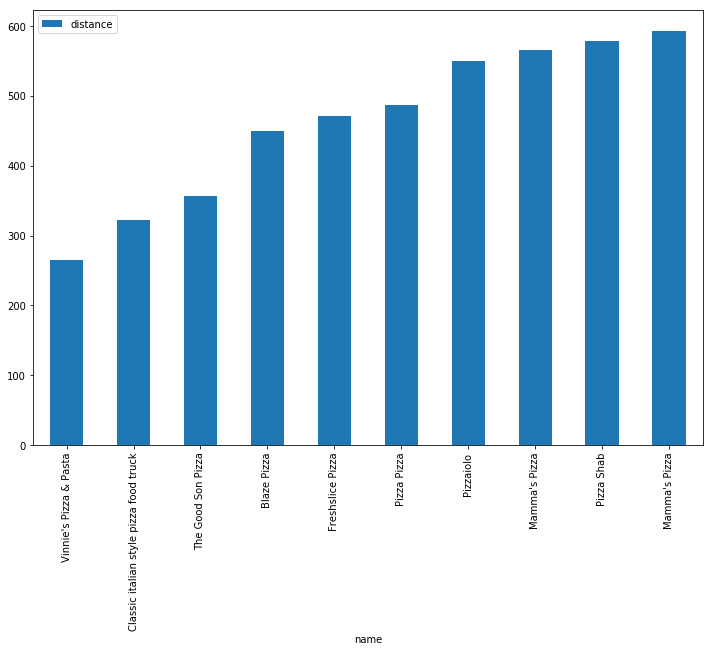

In [52]:
ax1 = closest_pizza_places.plot.bar(x="name", y="distance", figsize=(12 , 8))
ax1

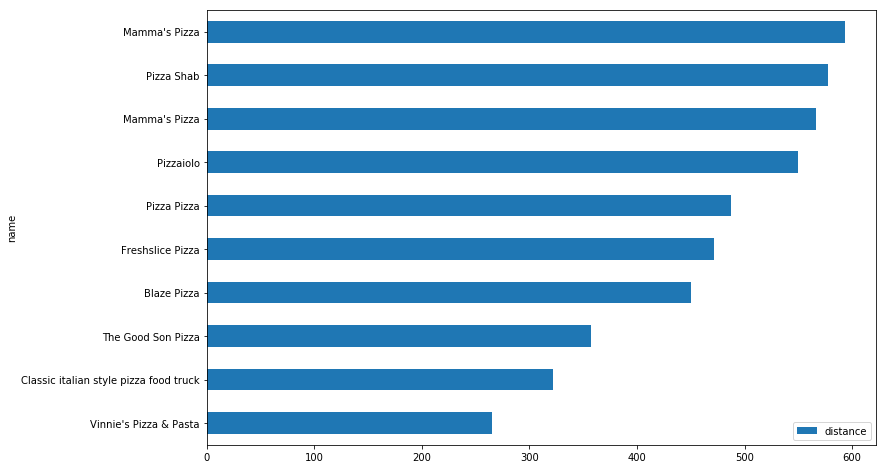

In [53]:
ax2 = closest_pizza_places.plot.barh(x="name", y="distance", figsize=(12 , 8))
ax2

In [54]:
# creating a map of closest 10 places that is selling pizza
closest_pizza_map = folium.Map(location=[latitude, longitude], zoom_start=15)

# add red circle marker in the center of toronto 
folium.CircleMarker([latitude, longitude], fill=True, fill_color="red", fill_opacity=0.7, popup="Toronto Center", radius=12).add_to(closest_pizza_map)

# add blue markers in the top 10 closest places to the center of toronto which is selling pizza
for lat, lng, label in zip(closest_pizza_places.lat, closest_pizza_places.lng, closest_pizza_places.name):
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(closest_pizza_map)
    
closest_pizza_map

In [55]:
# ID's of the 10 most closest pizza places

pizza_list = ["4b7ddd2cf964a52001d82fe3", 
              "4c787c9181bca0936180fa14", 
              "5a9b3ef3d1a40244fc9e8373", 
              "5615b6c4498e3c32c67ad78f", 
              "504f3f4dc84ca7853139f4c2", 
              "4ce805f68ef78cfa1675979b", 
              "4b50edc9f964a5201c3927e3", 
              "552ff1d1498e5f41b0ccb3bd", 
              "5c53a0aea2a6ce002c9e3806", 
              "524a5b79498e2a7a5945a8e1"
             ]

In [56]:
CLIENT_ID1 = "WREKFROBMZAO540BWRQR0QW1XOB0WKCBRBKKUB1M51RADAKW"
CLIENT_SECRET1 = "Y2RGQNOH2ATHIWJJQWZST2W2OZIPCWHZ0RDCOZZTPAU4JCM2"

for pp in pizza_list:
    
    venue_idd = pp 
    url2 = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_idd, CLIENT_ID1, CLIENT_SECRET1, VERSION)

    result2 = requests.get(url2).json()
    try:
        print(result2['response']['venue']['rating'])
    except:
        print('This venue has not been rated yet.')
        

This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
8.5
This venue has not been rated yet.
5.3
6.5
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.


In [57]:
# and we coclude of that , that the 4th, 6th, 7th who only have a rating
# let's put their ratings in a list

rating_list = [8.5, 5.3, 6.5]
places_with_rating =  ["Blaze Pizza", "Pizza Pizza", "Pizzaiolo"]
pizza_ratings_dictionary = {"Place":places_with_rating, "Rate":rating_list}
df_top_nearby3 = pd.DataFrame(pizza_ratings_dictionary, columns=['Place', 'Rate'])

#creat a columns for the coordinates of the places and add it to the dataframe

lat_list = {43.656518:"Blaze Pizza", 43.657879:"Pizza Pizza", 43.654332:"Pizzaiolo"}
lon_list = {-79.380015:"Blaze Pizza", -79.381729:"Pizza Pizza", -79.391107:"Pizzaiolo"}

df_top_nearby3["latitude"] = lat_list
df_top_nearby3["longitude"] = lon_list

df_top_nearby3

,Place,Rate,latitude,longitude
0,Blaze Pizza,8.5,43.656518,-79.380015
1,Pizza Pizza,5.3,43.657879,-79.381729
2,Pizzaiolo,6.5,43.654332,-79.391107


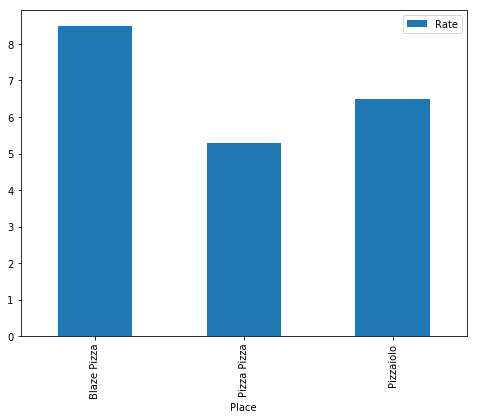

In [58]:
ax = df_top_nearby3.plot.bar(x="Place", y="Rate", figsize=(8, 6))
ax

In [59]:
top3_map = folium.Map(location=[latitude, longitude], zoom_start=15)

# add red circle marker in the center of toronto 
folium.CircleMarker([latitude, longitude], fill=True, fill_color="red", fill_opacity=0.7, popup="Toronto Center", radius=12).add_to(top3_map)

# add blue markers in the top 3 closest places to the center of toronto which is selling pizza
for lat, lng, label in zip(df_top_nearby3.latitude, df_top_nearby3.longitude, df_top_nearby3.Place):
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(top3_map)
    
top3_map

<p><b> And we eventuly concolude that "Blaze Pizza" is THE BEST and NEAREST Pizza Restourant you can visit if you are in the centere of Toronto<p><b>